
# Assignment 6: Logistic Churn Estimator

__This project aims to create an estimator for Churn, by creating a Logistic Regressive Estimator based on a few key variables.__

## Initial Setup
1) Initialize the libraries(Pandas, matplotlib, Scikit-Learn, Scikit-Plot, Collections)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
import sklearn.metrics as mt
import seaborn as sns
import warnings

In [3]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter("ignore", FutureWarning)

2) Read the Fitness Club data
3) Initialize the Columns with more readable names.

In [4]:
master_data = pd.read_excel("Fitness Club Data V4.xlsx","Fitness Club")
master_data.columns = ["Enrollment Date", "Annual Cost", "Down Payment", "Months Due", "Payment Type", "Uses", "Age",
                       "Gender", "Churn"]
master_data.head(5)  # Print the first 5 rows.

,Enrollment Date,Annual Cost,Down Payment,Months Due,Payment Type,Uses,Age,Gender,Churn
0,20190101,1830.2340,210.0000,6.0,CreditCard,1,0,0,0
1,20190101,1296.6660,1296.6660,6.0,Cash,0,0,0,0
2,20190101,930.4428,105.0000,5.0,Cash,0,0,0,0
3,20190102,798.3696,199.5924,9.0,DirectDebit,0,0,1,0
4,20190103,1206.2400,210.0000,9.0,Cheque,0,0,0,0


## Data Cleaning
1) Convert the Enrollment Date from Integer to Date Type.

In [5]:
master_data["Enrollment Date"] = pd.to_datetime(master_data["Enrollment Date"],
                                                format="%Y%m%d")  # %Y refers to 4-digit Year, %m refers to 2-digit Month, %d refers to 2-digit Day
master_data.head(5)

,Enrollment Date,Annual Cost,Down Payment,Months Due,Payment Type,Uses,Age,Gender,Churn
0,2019-01-01,1830.2340,210.0000,6.0,CreditCard,1,0,0,0
1,2019-01-01,1296.6660,1296.6660,6.0,Cash,0,0,0,0
2,2019-01-01,930.4428,105.0000,5.0,Cash,0,0,0,0
3,2019-01-02,798.3696,199.5924,9.0,DirectDebit,0,0,1,0
4,2019-01-03,1206.2400,210.0000,9.0,Cheque,0,0,0,0


2) Process the age, by finding the average and replace all errored ages ( Below 17 and above 79) to the average age.

In [6]:
filtered_age = master_data[(master_data["Age"] > 16) & (master_data["Age"] < 80)][
    "Age"]  # Selecting Ages within the Age limit
avg_age = round(filtered_age.mean())  # Finding the Mean of the ages
master_data["Age"] = master_data["Age"].replace([x for x in range(100) if (x < 18) | (x >= 99)],
                                                avg_age)  # Replace errored ages to mean age

## Data Pre-Processing
1) Create a Month and a Year Column for use in the analysis.
2) Create a Column that contains the Down payment as a percentage of the Annual Cost.
3) Clean the Down Payment Percent Column by filling all the nulls with the Average of the Down Payment Column.

In [10]:
master_data["Month"] = pd.DatetimeIndex(master_data['Enrollment Date']).month
master_data["Year"] = pd.DatetimeIndex(master_data['Enrollment Date']).year
master_data["DP Percent"] = round(master_data["Down Payment"] / master_data["Annual Cost"], 2)
master_data = master_data.fillna(master_data["DP Percent"].mean(), axis=1)
master_data.head(5)

,Enrollment Date,Annual Cost,Down Payment,Months Due,Payment Type,Uses,Age,Gender,Churn,Month,Year,DP Percent
0,2019-01-01,1830.234,210.0,6.0,CreditCard,1,32,0,0,1,2019,0.11
1,2019-01-01,1296.666,1296.666,6.0,Cash,0,32,0,0,1,2019,1.0
2,2019-01-01,930.4428,105.0,5.0,Cash,0,32,0,0,1,2019,0.11
3,2019-01-02,798.3696,199.5924,9.0,DirectDebit,0,32,1,0,1,2019,0.25
4,2019-01-03,1206.24,210.0,9.0,Cheque,0,32,0,0,1,2019,0.17


## Data Visualizations
1) Plot the Churn rates for the various Payment types.
2) Plot the Churn rates for the Ages in Bins
3) Plot the Churn rates for the Uses in Bins
4) Plot the Churn rates for the various Months.
5) Plot the Churn rates for the various Years
6) Plot the Down Payment Percent vs Churn

Text(0.5, 1.0, 'Plotting Down Payment Percent against Churn')

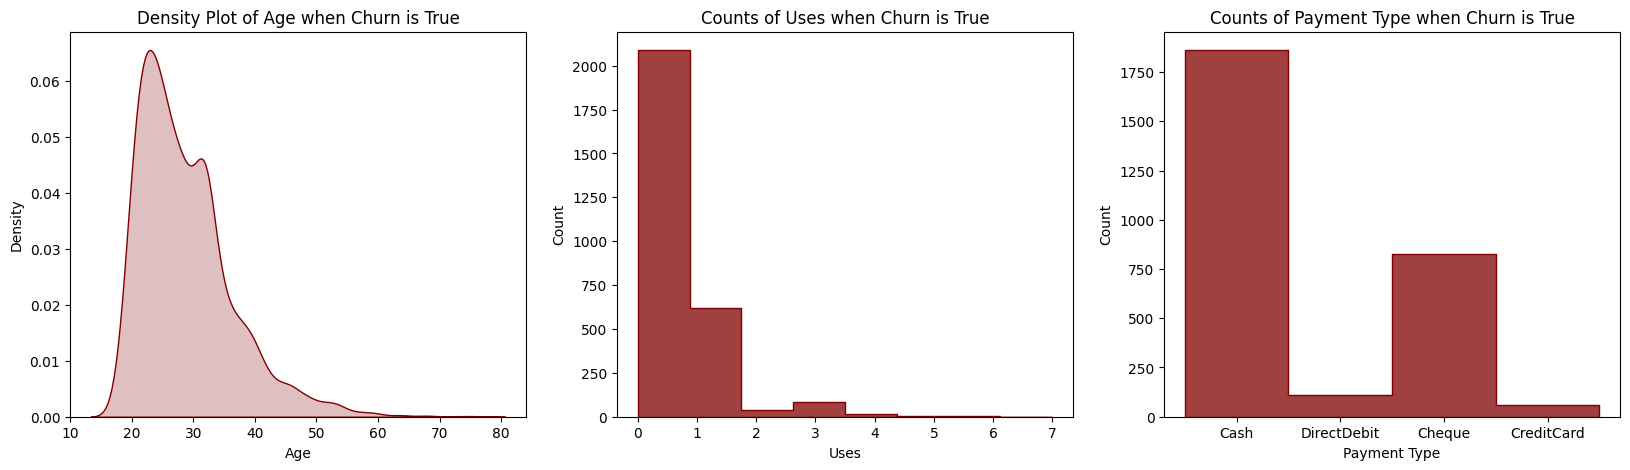

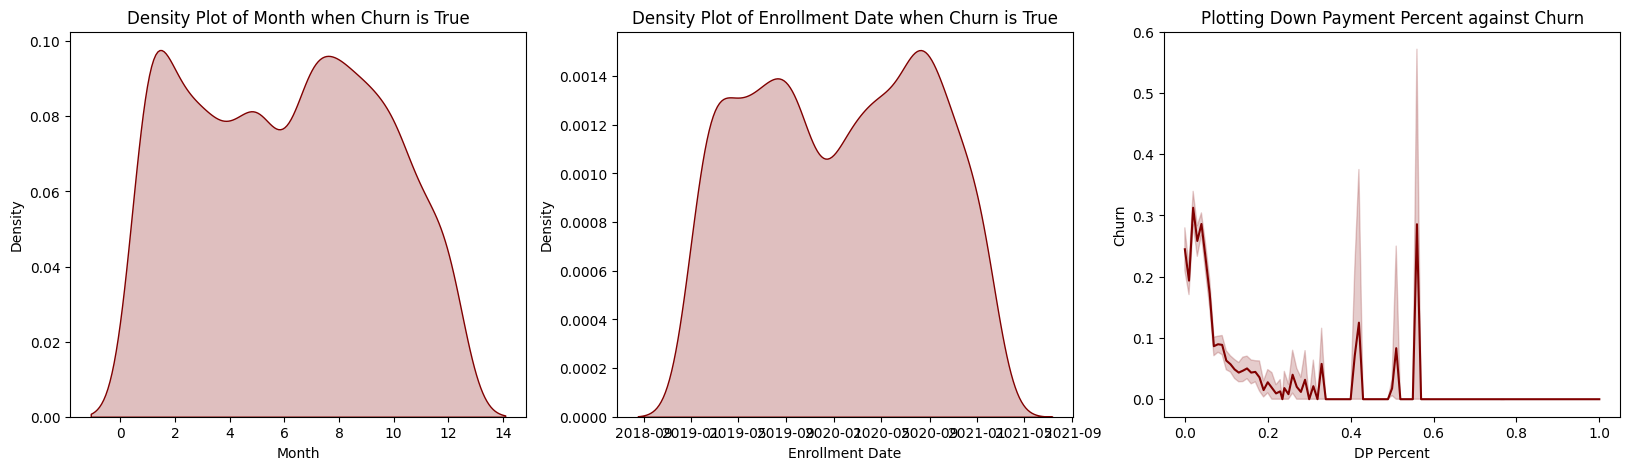

In [11]:
churn1 = master_data[master_data["Churn"] == 1]
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
age_plot = sns.kdeplot(churn1, x="Age", ax=axes[0], color="maroon", legend=False, fill=True)
uses_plot = sns.histplot(churn1, x="Uses", bins=8, color="maroon", ax=axes[1], legend=False,element="step")
payment_type_plot = sns.histplot(data=churn1, x="Payment Type", color="maroon",ax=axes[2],element="step")
axes[0].set_title("Density Plot of Age when Churn is True")
axes[1].set_title("Counts of Uses when Churn is True")
axes[2].set_title("Counts of Payment Type when Churn is True")
fig1, axes = plt.subplots(1, 3, figsize=(20, 5))
month_plot = sns.kdeplot(data=churn1,x="Month",color="maroon",ax=axes[0],fill=True)
year_plot = sns.kdeplot(data=churn1,x="Enrollment Date",color="maroon",ax=axes[1],fill=True)
dp_percent_plot = sns.lineplot(data=master_data,x="DP Percent",y="Churn",color="maroon",ax=axes[2],legend=True)
axes[0].set_title("Density Plot of Month when Churn is True")
axes[1].set_title("Density Plot of Enrollment Date when Churn is True")
axes[2].set_title("Plotting Down Payment Percent against Churn")

7) Find the Numerical Data

In [9]:
master_data.describe()

,Enrollment Date,Annual Cost,Down Payment,Months Due,Payment Type,Uses,Age,Gender,Churn,Month,Year,DP Percent
count,24843,24843.00,24843.0,24843.0,24843,24843.0,24843.0,24843.0,24843.0,24843.0,24843.0,24843.0
unique,818,2854.00,1417.0,369.0,4,9.0,62.0,2.0,2.0,12.0,3.0,84.0
top,2020-08-31 00:00:00,839.16,84.0,6.0,Cash,0.0,32.0,1.0,0.0,1.0,2020.0,1.0
freq,132,858.00,3642.0,3526.0,7760,9919.0,3132.0,12471.0,21985.0,3301.0,11364.0,3710.0
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8) Check Correlation between numerical values

In [10]:
numerical_cols = ["Annual Cost","Down Payment","Age"]
churn_numerical = master_data[numerical_cols]
churn_numerical = churn_numerical.astype(float)
cor = churn_numerical.dropna().corr()
cor

,Annual Cost,Down Payment,Age
Annual Cost,1.000000,0.277764,-0.012391
Down Payment,0.277764,1.000000,0.163225
Age,-0.012391,0.163225,1.000000


## Creating the Estimator
1) Select the variables you want to use in the logistic Estimator
2) Create the dummy variables if the data is categorical
3) Create a separate Data Frame for the Churn column as it is our Output.
4) Split the dataset into a train dataset and a test dataset.

In [11]:
estimator_data = master_data[["Month", "Age", "Payment Type", "DP Percent", "Annual Cost", "Gender", "Uses","Year"]]
estimator_data = pd.get_dummies(estimator_data, columns=["Payment Type", "Month", "Uses","Year"], drop_first=True,
                                prefix=["pmntType", "month", "uses","year"]) # Creating the dummy variables and dropping the first categorical value.
estimator_data.head()
estimated_data = master_data[["Churn"]]
X_train, X_test, Y_train, Y_test = train_test_split(estimator_data, estimated_data, test_size=0.2,
                                                            random_state=0) # Split the datasets.
log_reg = LogisticRegression(max_iter=1000) # Create the logistic regression object.
Y_train = Y_train.astype('int') # Convert the Y values to int.
log_reg.fit(X_train, Y_train.values.ravel()) # Fit the X and Y data.
estimand = log_reg.predict(X_test) # Predit the Test Output against the model.

## Validating the Estimator
We can verify if our model is good by taking a look at a few metrics, like
1) The Confusion Matrix
2) The Classification Report
3) The ROC Curve
4) The Gains & Lift chart, also called the cumulative Gains Curve

### The Confusion matrix

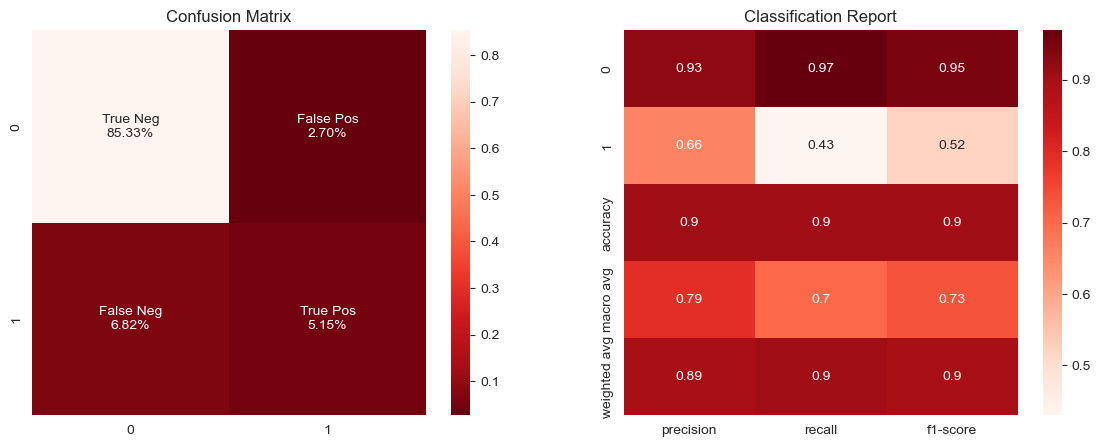

In [25]:
Y_test = Y_test.astype('int')
confusion_matrix = mt.confusion_matrix(Y_test, estimand)
fig2, axes = plt.subplots(1, 2, figsize=(14, 5))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
confusion_matrix = confusion_matrix/np.sum(confusion_matrix)
confusion_matrix_plot = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Reds_r',ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[1].set_title("Classification Report")
class_report = mt.classification_report(Y_test, estimand,output_dict=True)
class_report = pd.DataFrame(class_report).transpose()
class_report = class_report[['precision', 'recall', 'f1-score']]
class_report_plot = sns.heatmap(class_report,cmap='Reds',annot=class_report,ax=axes[1])

## The RoC Curve and the Gains Chart

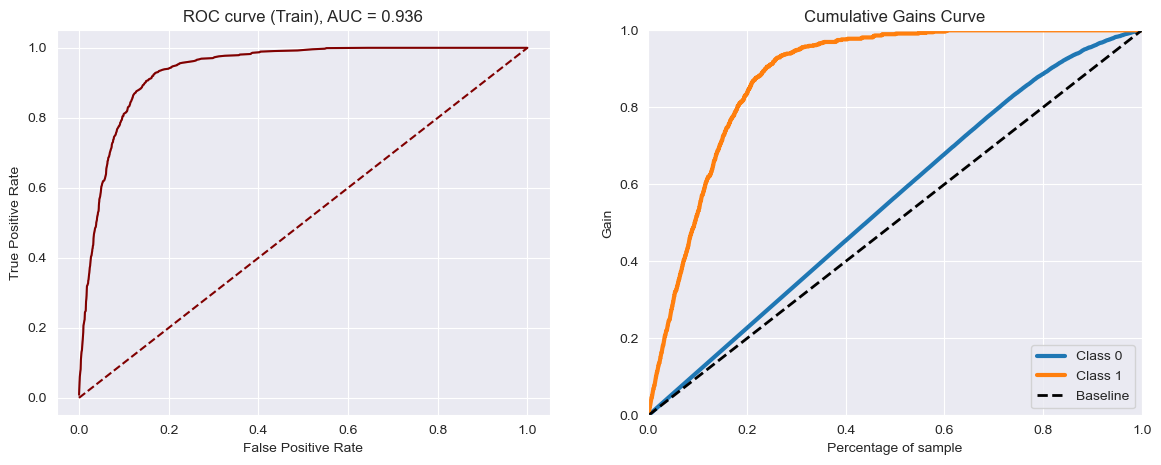

In [26]:
estimand_pred_prob = log_reg.predict_proba(X_test)
fpr, tpr, _ = mt.roc_curve(Y_test, estimand_pred_prob[::, 1])
auc = mt.roc_auc_score(Y_test, estimand_pred_prob[::, 1])
rounded_auc = round(auc.astype('float'),3)
fig3, axes = plt.subplots(1, 2, figsize=(14, 5))
curve1 = sns.lineplot(x=fpr, y=tpr, color="maroon",ax=axes[0])
curve2 = sns.lineplot([0, 1], color='Maroon', linestyle='--',ax=axes[0])
axes[0].set_title('ROC curve (Train), AUC = '+repr(rounded_auc))
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
skplt.metrics.plot_cumulative_gain(Y_test, estimand_pred_prob,ax=axes[1])
plt.show()

## Identify Most Performing Variables

In [27]:
feature_values = log_reg.coef_
coeff_table = pd.DataFrame({"Feature Names": X_train.columns, "Coefficient Value": abs(feature_values[0])})
coeff_table = coeff_table.sort_values(by="Coefficient Value", ascending=False)
coeff_table

,Feature Names,Coefficient Value
1,DP Percent,8.760413
23,uses_6,4.271592
5,pmntType_CreditCard,3.939857
24,uses_7,3.261801
22,uses_5,3.239983
6,pmntType_DirectDebit,3.170177
21,uses_4,2.862926
25,uses_8,2.070000
20,uses_3,1.862538
19,uses_2,1.577629


Looking at the features, the extremely high value of Down Payment percent has traditionally not been an indicator for Churn. Moreover, there are multiple instances of Annual Cost having inconsistencies. So it would be useful to refit the model without the Down Payment or Annual Cost

## Recreating the Estimator
1) Recreating the Estimator

In [29]:
estimator_data = master_data[["Month", "Age", "Payment Type", "Gender", "Uses","Year"]]
estimator_data = pd.get_dummies(estimator_data, columns=["Payment Type", "Month", "Uses","Year"], drop_first=True,
                                prefix=["pmntType", "month", "uses","year"]) # Creating the dummy variables and dropping the first categorical value.
estimator_data.head()
estimated_data = master_data[["Churn"]]
X_train, X_test, Y_train, Y_test = train_test_split(estimator_data, estimated_data, test_size=0.2,
                                                            random_state=0) # Split the datasets.
log_reg = LogisticRegression(max_iter=1000) # Create the logistic regression object.
Y_train = Y_train.astype('int') # Convert the Y values to int.
log_reg.fit(X_train, Y_train.values.ravel()) # Fit the X and Y data.
estimand = log_reg.predict(X_test) # Predit the Test Output against the model.

2) Plotting the Confusion Matrix and the Classification Report

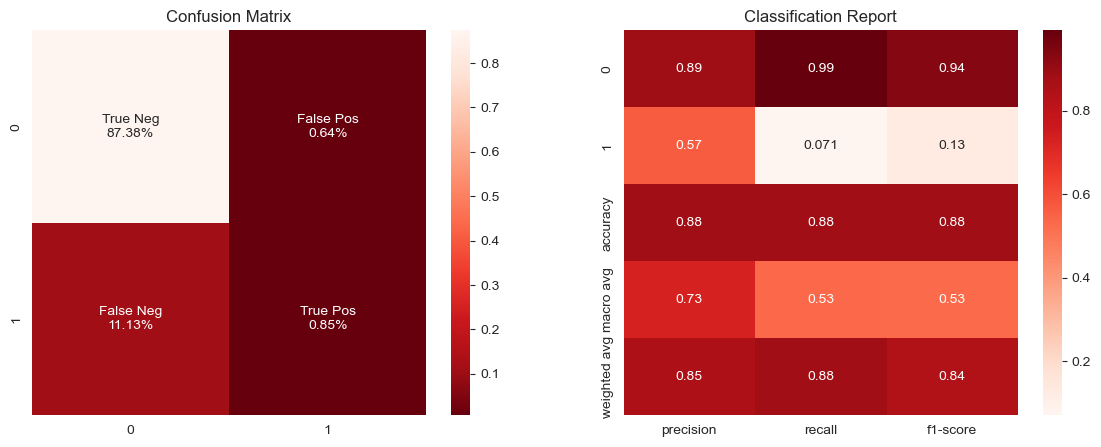

In [30]:
Y_test = Y_test.astype('int')
confusion_matrix = mt.confusion_matrix(Y_test, estimand)
fig4, axes = plt.subplots(1, 2, figsize=(14, 5))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
confusion_matrix = confusion_matrix/np.sum(confusion_matrix)
confusion_matrix_plot_redone = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Reds_r',ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[1].set_title("Classification Report")
class_report = mt.classification_report(Y_test, estimand,output_dict=True)
class_report = pd.DataFrame(class_report).transpose()
class_report = class_report[['precision', 'recall', 'f1-score']]
class_report_plot_redone = sns.heatmap(class_report,cmap='Reds',annot=class_report,ax=axes[1])

3) Creating the RoC Curves and the Gains Chart

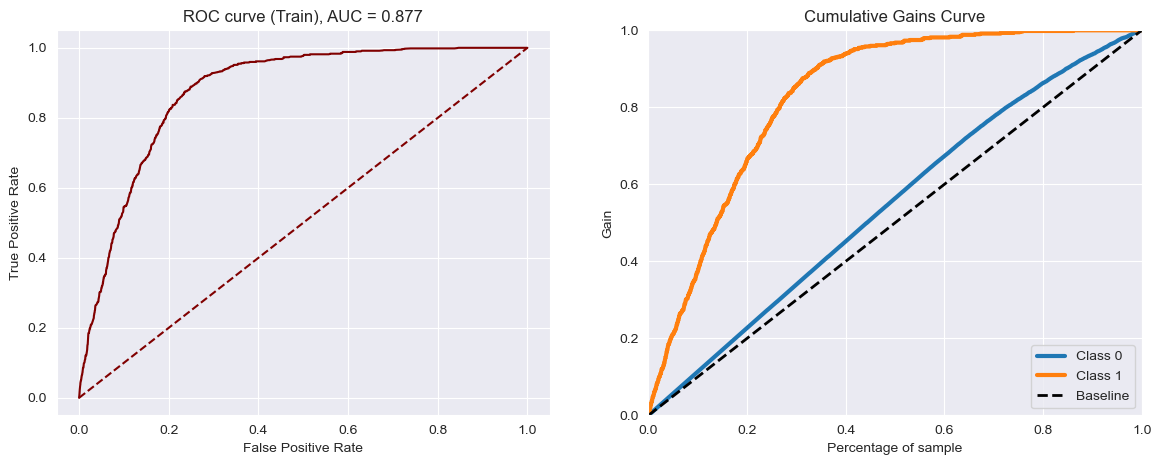

In [31]:
estimand_pred_prob = log_reg.predict_proba(X_test)
fpr, tpr, _ = mt.roc_curve(Y_test, estimand_pred_prob[::, 1])
auc = mt.roc_auc_score(Y_test, estimand_pred_prob[::, 1])
rounded_auc = round(auc.astype('float'),3)
fig5, axes = plt.subplots(1, 2, figsize=(14, 5))
curve1_redone = sns.lineplot(x=fpr, y=tpr, color="maroon",ax=axes[0])
curve2_redone = sns.lineplot([0, 1], color='Maroon', linestyle='--',ax=axes[0])
axes[0].set_title('ROC curve (Train), AUC = '+repr(rounded_auc))
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
skplt.metrics.plot_cumulative_gain(Y_test, estimand_pred_prob,ax=axes[1])
plt.show()

In [32]:
feature_values = log_reg.coef_
coeff_table = pd.DataFrame({"Feature Names": X_train.columns, "Coefficient Value": abs(feature_values[0])})
coeff_table = coeff_table.sort_values(by="Coefficient Value", ascending=False)
coeff_table

,Feature Names,Coefficient Value
21,uses_6,4.037158
22,uses_7,3.768429
3,pmntType_CreditCard,3.432744
20,uses_5,3.193470
23,uses_8,3.019240
19,uses_4,2.673149
4,pmntType_DirectDebit,2.598747
18,uses_3,1.801968
17,uses_2,1.374234
16,uses_1,0.696941


From the above results, we can see that the No. of Uses and the Payment Type are still the most reliable indicators.

In [16]:
master_data["DP Percent"].mean()

0.23530155013725504

AttributeError: 'AxesSubplot' object has no attribute 'show'

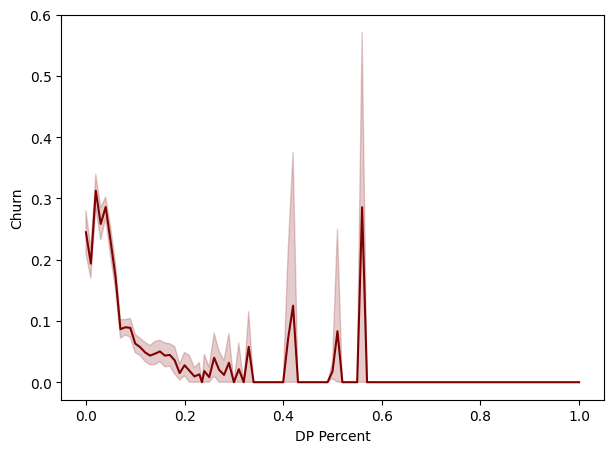

In [15]:
dp_percent_plot = sns.lineplot(data=master_data,x="DP Percent",y="Churn",color="maroon",legend=True)
dp_percent_plot.show()